In [31]:
#importing necessary libraries needed for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
from matplotlib import pyplot as plt

#reading the file
data = pd.read_csv("amazon_reviews_cleaned.csv")

#printing the first 5 rows of the csv file
print(data.head())


   Unnamed: 0 Reviewer Name  Star Rating  \
0           0          ak01            4   
1           1           KC5            5   
2           2          Joey            2   
3           3            PE            5   
4           4        Johnny            5   

                                              Review      Review Dates  
0  I cannot comment on the value of this mouse as...  December 7, 2022  
1  Use for regular computer work and CAD. Works a...  December 6, 2022  
2  This mouse is great from every perspective, bu...  December 5, 2022  
3  This fully featured mouse is a real pleasure t...  December 5, 2022  
4  I went from a 60g mouse to this thing and the ...  December 4, 2022  


In [32]:
#look at the statistical properties of the data
print(data.describe())

        Unnamed: 0  Star Rating
count  2559.000000  2559.000000
mean   1279.000000     4.050020
std     738.863993     1.428187
min       0.000000     1.000000
25%     639.500000     3.000000
50%    1279.000000     5.000000
75%    1918.500000     5.000000
max    2558.000000     5.000000


In [33]:
#remove all the rows containing missing values
data = data.dropna()

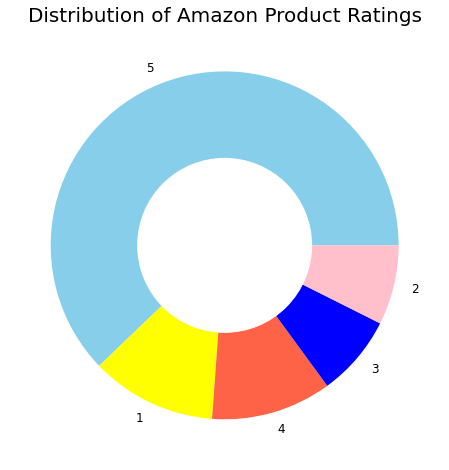

<Figure size 432x288 with 0 Axes>

In [55]:
#making a pie chart to see the distribution of amazon product ratings

ratings = data["Star Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellow", "tomato", "blue", "pink"]
plt.figure(figsize=(10,8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()
#plt.savefig('piechart.png', dpi=300)
plt.show()


In [35]:
#import nltk
#nltk.download('vader_lexicon') 
#Using sentiment intensity analyzer to score each review's sentiment
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
[sia.polarity_scores(i) for i in data["Review"]]

[{'neg': 0.083, 'neu': 0.768, 'pos': 0.149, 'compound': 0.8445},
 {'neg': 0.076, 'neu': 0.552, 'pos': 0.372, 'compound': 0.8615},
 {'neg': 0.218, 'neu': 0.66, 'pos': 0.121, 'compound': -0.775},
 {'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'compound': 0.9717},
 {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.9559},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.071, 'neu': 0.858, 'pos': 0.072, 'compound': 0.024},
 {'neg': 0.078, 'neu': 0.817, 'pos': 0.105, 'compound': 0.2023},
 {'neg': 0.031, 'neu': 0.732, 'pos': 0.237, 'compound': 0.7913},
 {'neg': 0.031, 'neu': 0.888, 'pos': 0.081, 'compound': 0.6428},
 {'neg': 0.0, 'neu': 0.977, 'pos': 0.023, 'compound': 0.5267},
 {'neg': 0.0, 'neu': 0.626, 'pos': 0.374, 'compound': 0.9886},
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.4588},
 {'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'compound': 0.6597},
 {'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'compound': 0.753},
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound

In [36]:
sentiments = SentimentIntensityAnalyzer()
'''creating 3 columns to the dataset as Positive, Negative, and Neutral by calculating 
the sentiment scores of the customer reviews mentioned in the text column of the dataset'''
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
#Printing out the first five rows. Now each review has a star rating and a sentiment score in terms of how positive,
#neutal and negative it is.
print(data.head())

   Unnamed: 0 Reviewer Name  Star Rating  \
0           0          ak01            4   
1           1           KC5            5   
2           2          Joey            2   
3           3            PE            5   
4           4        Johnny            5   

                                              Review      Review Dates  \
0  I cannot comment on the value of this mouse as...  December 7, 2022   
1  Use for regular computer work and CAD. Works a...  December 6, 2022   
2  This mouse is great from every perspective, bu...  December 5, 2022   
3  This fully featured mouse is a real pleasure t...  December 5, 2022   
4  I went from a 60g mouse to this thing and the ...  December 4, 2022   

   Positive  Negative  Neutral  
0     0.149     0.083    0.768  
1     0.372     0.076    0.552  
2     0.121     0.218    0.660  
3     0.358     0.000    0.642  
4     0.196     0.000    0.804  


In [37]:
#Analyzing the statiscal properties of the sentiment score distribution and the star ratings distribution. 
print(data.describe())

        Unnamed: 0  Star Rating     Positive     Negative      Neutral
count  2554.000000  2554.000000  2554.000000  2554.000000  2554.000000
mean   1279.005873     4.048160     0.212965     0.043112     0.743931
std     738.631841     1.428965     0.181152     0.064534     0.169663
min       0.000000     1.000000     0.000000     0.000000     0.000000
25%     640.250000     3.000000     0.091000     0.000000     0.674000
50%    1279.500000     5.000000     0.167000     0.015500     0.777000
75%    1917.750000     5.000000     0.287000     0.067000     0.851000
max    2558.000000     5.000000     1.000000     0.650000     1.000000


In [38]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")
sentiment_score(x, y, z)

Neutral


In [39]:
#Therefore most people's sentiment are actually neutral when reviewing this mouse on Amazon.

In [40]:
#Total sentiment scores:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  543.9119999999992
Negative:  110.10900000000021
Neutral:  1899.9990000000032


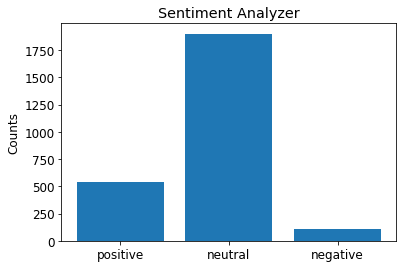

In [54]:
#Printing out a bar chart of the sentiment score distribution
fig, ax = plt.subplots()

X = ['positive', 'neutral', 'negative']
counts = [x, z, y]

ax.bar(X, counts)

ax.set_ylabel('Counts')
ax.set_title('Sentiment Analyzer')
plt.savefig("barchart1.png")
plt.show()

In [43]:
#Now we want to contrast this dististribution to the one about amazon product ratings by customers, to do this, 
#we read the file and group the reveiws by star ratings as can see below. 
df = pd.read_csv("amazon.csv")

In [44]:
#printing out the first five reveiws
df.head()

,Unnamed: 0,Star Rating,Review
0,0,4,I cannot comment on the value of this as I go...
1,1,5,"for regular computer and CAD. Works awesome,..."
2,2,2,"This is from every perspective, but on new M..."
3,3,5,This fully featured is a real pleasure to an...
4,4,5,I went from a 60g to this and the difference...


In [45]:
#sorting them into positive, neutral and negative - matches with previous analysis so distribution can be compared
df.loc[df['Star Rating']<3, 'Score'] = 0 #Negative
df.loc[df['Star Rating']==3, 'Score'] = 0.5 #Neutral
df.loc[df['Star Rating']>3, 'Score'] = 1 #Positive

In [46]:
df.head()

,Unnamed: 0,Star Rating,Review,Score
0,0,4,I cannot comment on the value of this as I go...,1.0
1,1,5,"for regular computer and CAD. Works awesome,...",1.0
2,2,2,"This is from every perspective, but on new M...",0.0
3,3,5,This fully featured is a real pleasure to an...,1.0
4,4,5,I went from a 60g to this and the difference...,1.0


In [47]:
#total amount of values
df['Score'].value_counts()

1.0    1879
0.0     487
0.5     193
Name: Score, dtype: int64

In [48]:
df_1 = df[df['Score'] == 1.0]
df_00 = df[df['Score'] == 0.5]
df_0 = df[df['Score'] == 0.0]
#df_0.head
len(df_0)
reviews = df['Review']
#print(reviews[0])

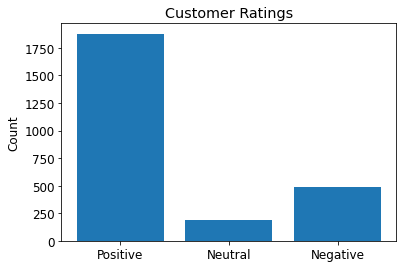

In [56]:
#creating a bar chart on the distribution of star ratings and saving the plot. 
fig, ax = plt.subplots()

X = ['Positive', 'Neutral', 'Negative']
counts = [len(df_1), len(df_00), len(df_0)]

ax.bar(X, counts)

ax.set_ylabel('Count')
ax.set_title('Customer Ratings')
plt.savefig("chart2.png")
plt.show()

In [50]:
#Now we want to analyse and understand the distribution further by creating two box plots.
#we first create a column on sentiment scores - analysed by the sentiment intensity analyzer
data["Sentiment Score"] = [sentiments.polarity_scores(i)["compound"] for i in data["Review"]]

In [51]:
data["Sentiment Score"].head()

0    0.8445
1    0.8615
2   -0.7750
3    0.9717
4    0.9559
Name: Sentiment Score, dtype: float64

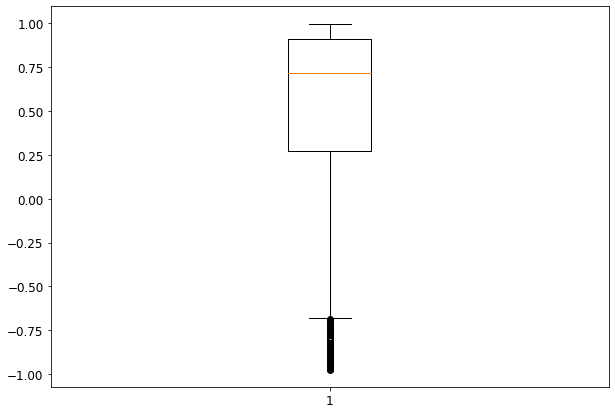

In [57]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np


# Creating dataset

data1 = data["Sentiment Score"]

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(data1)

# show plot
plt.savefig("boxplot1.png")
plt.show()

#on a scale of -1 to 1, with 1 being absolutely positive and -1 absolutely negative.

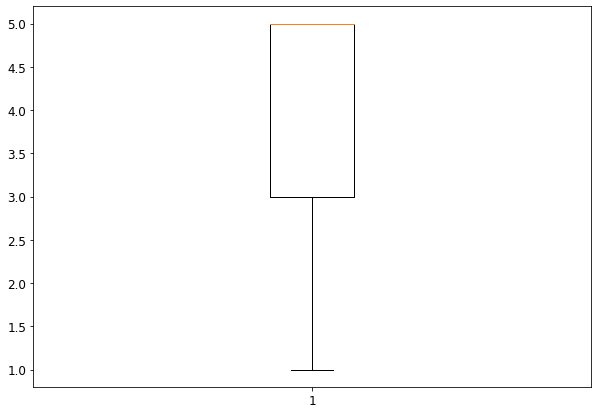

In [58]:
#we then create a boxplot on the distribution of star ratings. 
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(data["Star Rating"])
# show plot
plt.savefig("boxplot2.png")
plt.show()
#on a scale of 1-5 (1 being 1 star - absolute negative, and 5 is 5 star - absolute positive). 
#we can see the median (the orange line) of two box plots is significantly different.